In [33]:
from setup_env import setup_environment

setup_environment()

In [34]:
from project.wfc.factory import Factory
from project.config import DATA_SOURCE
from project.machine_learning.model_mc import ModelMC
from project.wfc.grid import Rect
from project.wfc.wfc import WFC
from project.wfc.grid import Grid
from project.wfc.repository import repository
from project.visualization.grid_renderer import grid_renderer

In [35]:
factory = Factory(DATA_SOURCE)

patterns = factory.create_patterns()

rect = Rect(width=10, height=10)

grid = Grid(rect=rect, patterns=repository.get_all_patterns())

judge = ModelMC(view=Rect(3, 3))
#judge.train(grids_path="data/grids/wfc/train/", portion=1)

wfc = WFC(grid=grid, judge=judge)

INFO - Validation Result: success



In [36]:
judge.load_weights("mmc_1000")

In [9]:
judge.save_weights("mmc_1000")

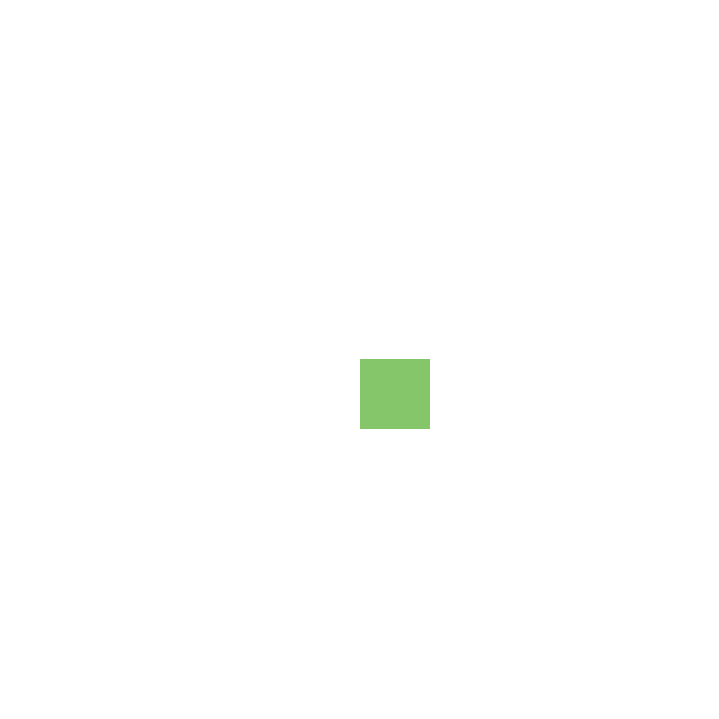

In [37]:
if wfc.step(early_stopping=True).success:
    grid_renderer.draw(grid=grid, show_borders=False, seed=42, show=True)

In [38]:
tries = 0
is_succeeded = False

while is_succeeded != True: 
    tries += 1
    is_succeeded = wfc.generate()

tries

1

In [40]:
TARGET = 1000

for _ in range(TARGET):
    is_succeeded = False
    while is_succeeded != True:
        is_succeeded = wfc.generate()
    #wfc.grid.serialize("data/grids/wfcwmc/")

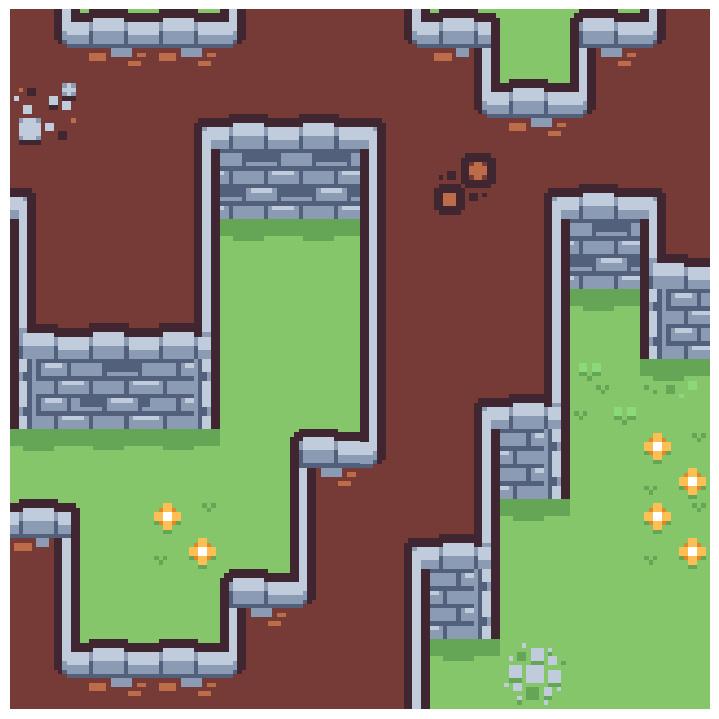

In [39]:
grid_renderer.draw(grid=grid, show_borders=False, seed=42)